In [1]:
import gym
import json
import datetime as dt

from stable_baselines.common.policies import MlpPolicy
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import PPO2
from StockTradingEnv import StockTradingEnv

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/AAPL.csv')
df = df.sort_values('Date')

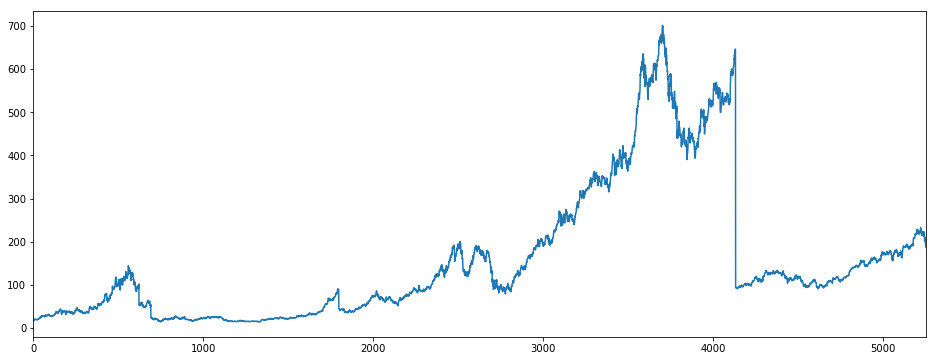

In [3]:
df['Close'].plot(figsize=(16,6))

In [4]:
env = DummyVecEnv([lambda: StockTradingEnv(df)])
model = PPO2(MlpPolicy, env)
model.learn(total_timesteps=20000)
obs = env.reset()





Instructions for updating:
Use keras.layers.flatten instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




/Users/max.williams/git/ml-finance/examples/Stock-Trading-Environment/StockTradingEnv.py:79: RuntimeWarning: invalid value encountered in double_scalars
  prev_cost + additional_cost) / (self.shares_held + shares_bought)


In [5]:
test_results = pd.DataFrame()

for i in range(2000):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    test_results = test_results.append(env.render(), ignore_index=True)

test_results = test_results.set_index('step')

In [6]:
test_results.head(4)

,balance,cost_basis,max_net_worth,net_worth,profit,shares_held,total_sales_value,total_shares_sold
step,,,,,,,,
571.0,10000.0,0.0,10000.0,10000.0,0.0,0.0,0.0,0.0
572.0,10000.0,0.0,10000.0,10000.0,0.0,0.0,0.0,0.0
573.0,10000.0,0.0,10000.0,10000.0,0.0,0.0,0.0,0.0
574.0,10000.0,0.0,10000.0,10000.0,0.0,0.0,0.0,0.0


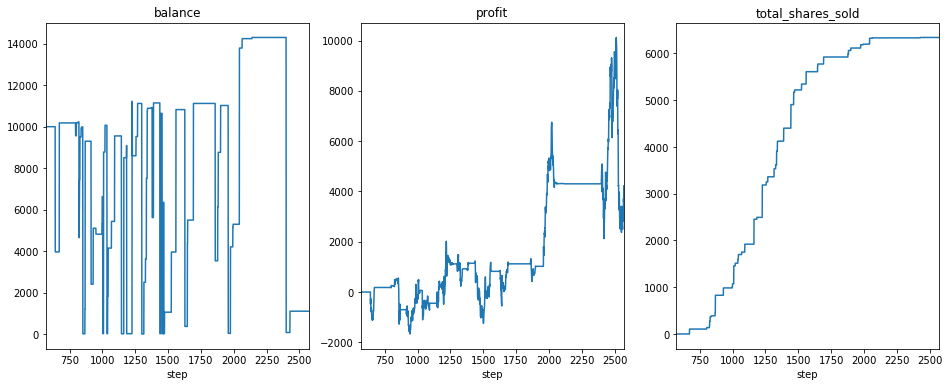

In [7]:
columns_to_plot = ['balance', 'profit', 'total_shares_sold']
fig, axes = plt.subplots(nrows=1,ncols=len(columns_to_plot), figsize=(16,6))
for i in range(len(columns_to_plot)):
    axes[i].title.set_text(columns_to_plot[i])
    test_results[columns_to_plot[i]].plot(ax=axes[i], subplots=True)
plt.show()